In [10]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from lifelines import KaplanMeierFitter

In [3]:
data = pd.read_csv('data_new.csv', delimiter=";")

survival_data = data.dropna()

In [51]:
mask = data['margins'] == 2
data['margins'][mask] = 1

/tmp/ipykernel_22186/3510148330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['margins'][mask] = 1


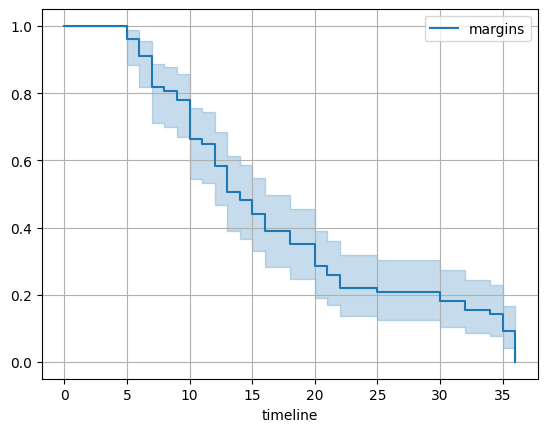

In [14]:
kmf = KaplanMeierFitter()
kmf.fit(durations = survival_data['time'], event_observed = survival_data['recidiva'], label='margins')
kmf.plot_survival_function()
plt.grid()

Margins

Text(0.5, 1.0, 'Survival for different margins status')

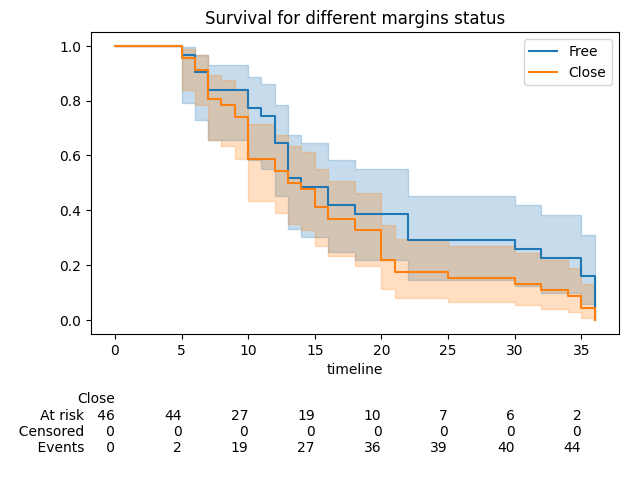

In [17]:
# gráfica
ax = plt.subplot(111)

# filtro
free = (data["margins"] == 0)

# 1 label
kmf.fit(durations = survival_data['time'][free], event_observed = survival_data['recidiva'][free], label = "Free")
kmf.plot_survival_function(ax = ax)

# 2 label
kmf.fit(survival_data['time'][~free], event_observed = survival_data['recidiva'][~free], label = "Close")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

# title
plt.title("Survival for different margins status")

Sex

Text(0.5, 1.0, 'Survival by sex')

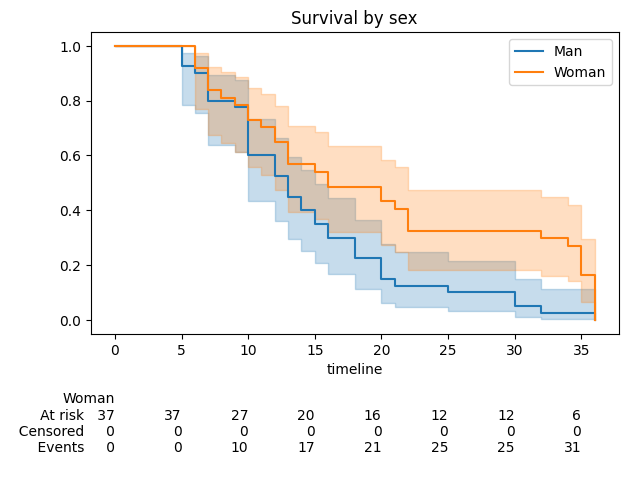

In [19]:
# gráfica
ax = plt.subplot(111)

# filtro
free = (data["sexo"] == 0)

# 1 label
kmf.fit(durations = survival_data['time'][free], event_observed = survival_data['recidiva'][free], label = "Man")
kmf.plot_survival_function(ax = ax)

# 2 label
kmf.fit(survival_data['time'][~free], event_observed = survival_data['recidiva'][~free], label = "Woman")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

# title
plt.title("Survival by sex")

In [ ]:
# gráfica
ax = plt.subplot(111)

# filtro
free = (data["sexo"] == 0)

# 1 label
kmf.fit(durations = survival_data['time'][free], event_observed = survival_data['recidiva'][free], label = "Man")
kmf.plot_survival_function(ax = ax)

# 2 label
kmf.fit(survival_data['time'][~free], event_observed = survival_data['recidiva'][~free], label = "Woman")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

# title
plt.title("Survival by sex")

In [46]:
cols = ['loc', 'oh', 'tabaco', 'size', 'doi', 'n', 'ipn', 'margins', 'rt', 'ene', 'diff']

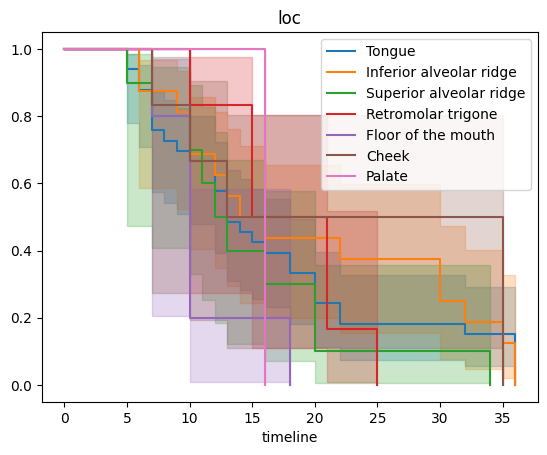

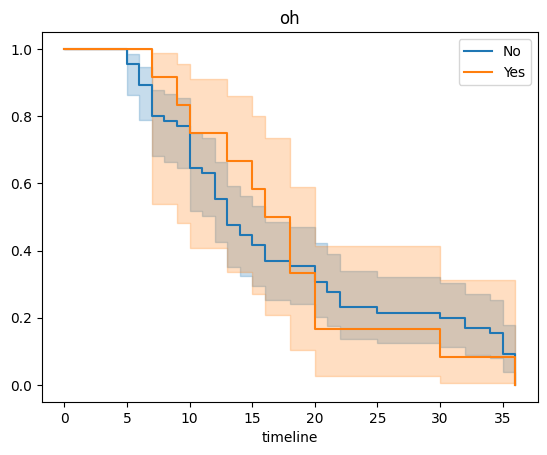

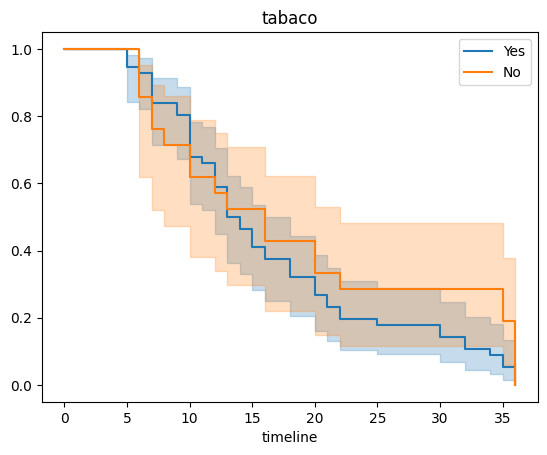

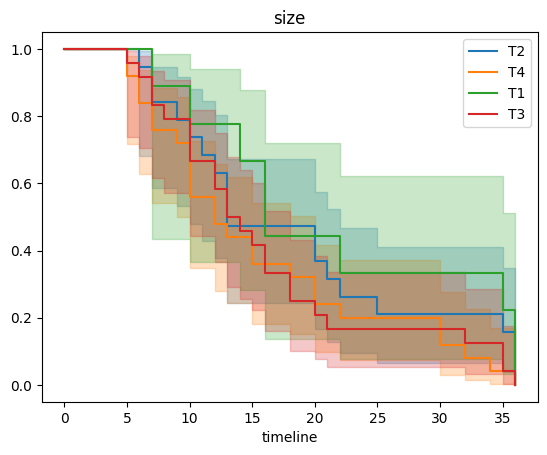

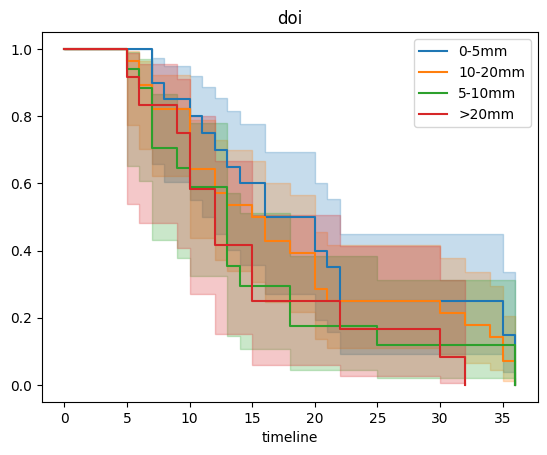

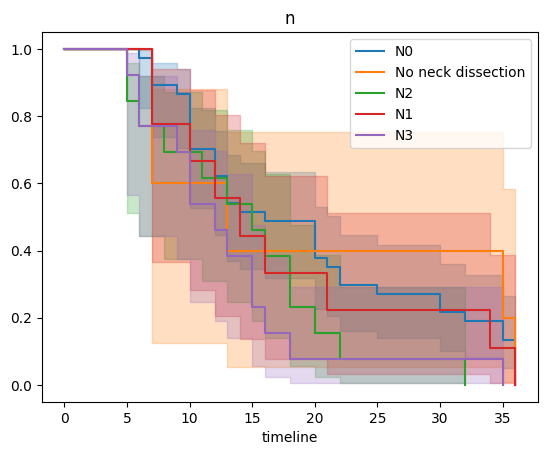

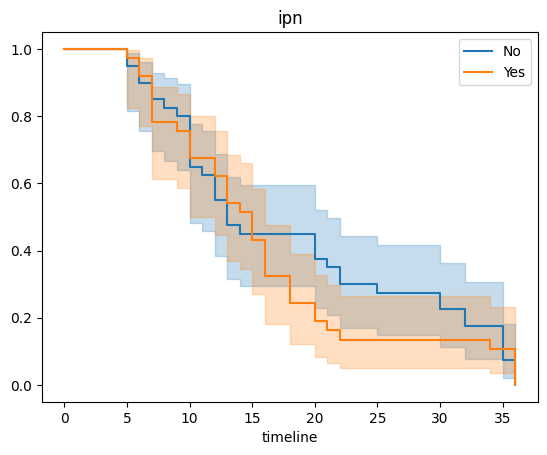

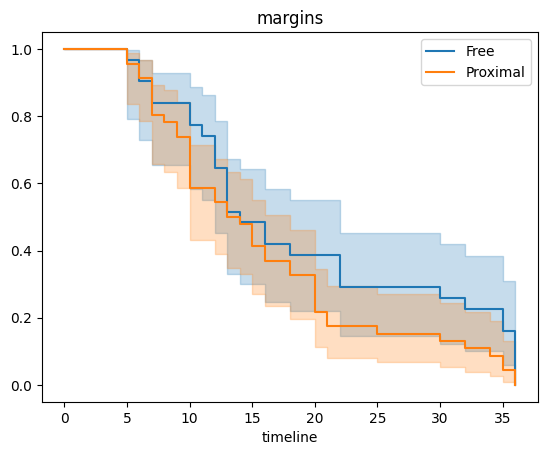

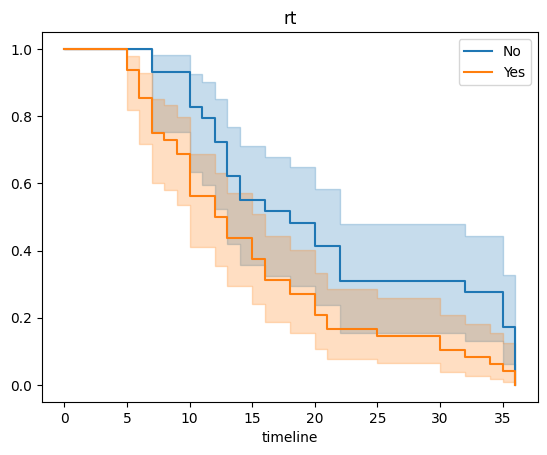

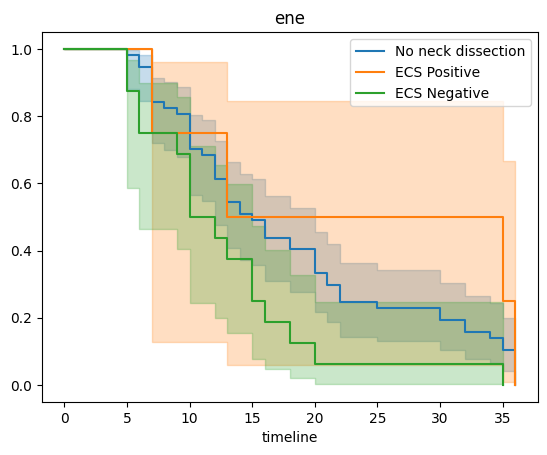

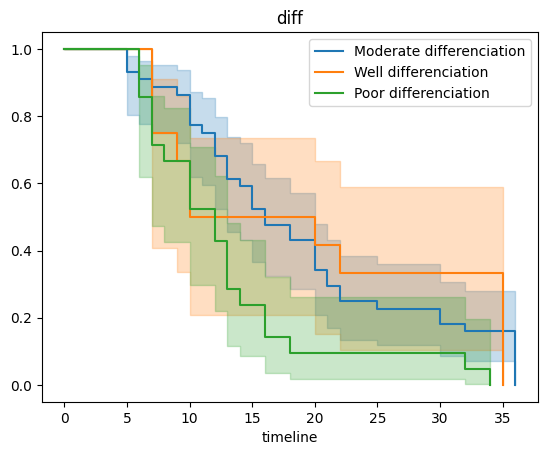

In [52]:
for var in cols:
    _data_var = pd.read_csv(f'{var}.csv', delimiter=";", index_col=0, header=None)
    counts = data[var].value_counts()
    values_var = counts.index
    ax = plt.subplot(111)
    for idx in counts.index:
        # 1 label
        label = _data_var.loc[idx].item()
        free = (data[var] == idx)
        kmf.fit(durations = survival_data['time'][free], event_observed = survival_data['recidiva'][free], label = label)
        kmf.plot_survival_function(ax = ax)
        
    plt.title(var)
    plt.show()

In [79]:
cols = ['loc', 'size', 'doi', 'n', 'ene', 'diff']
cols = ['loc']

In [80]:
new_data = data.copy()

In [81]:
for col in cols:
    dummies = pd.get_dummies(data[col], prefix = col)
    new_data = pd.concat([new_data, dummies[dummies.columns[1:]]], axis=1)
    new_data = new_data.drop(col, axis=1)

In [82]:
new_data = new_data * 1
new_data = new_data.dropna()

In [83]:
from lifelines import CoxPHFitter

In [84]:
cph = CoxPHFitter()

cph.fit(new_data, duration_col = 'time', event_col = 'recidiva')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 77 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'recidiva'
      baseline estimation = breslow
   number of observations = 77
number of events observed = 77
   partial log-likelihood = -248.82
         time fit was run = 2023-05-22 16:52:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sexo       -0.87       0.42       0.37            -1.61            -0.14                 0.20                 0.87
oh         -0.83       0.44       0.46            -1.72             0.07                 0.18                 1.07
tabaco     -0.09       0.92       0.33            -0.73             0.56                 0.48                 1.74
size       -0.30       0.74       0.32            -0.92             0.32                 0.40                 1.38
doi         0.15       1.16       0.23            -0.30             0.59                 0.74                 1.81
n           0.15       1.17       0.16            -0.16             0.47                 0.85                 1.61
ipn         0.31       1.37       0.32            -0.32             0.95                 0.73                 2.57
margins     0.31       1.37       0.35            -0.37             1.00                 0.69                 2.71
rt          0.47       1.60       0.45            -0.41             1.35                 0.66                 3.85
ene         0.26       1.29       0.24            -0.22             0.74                 0.80                 2.09
diff        0.33       1.40       0.27            -0.20             0.87                 0.82                 2.39
loc_1      -0.88       0.42       0.57            -2.00             0.25                 0.14                 1.28
loc_2      -0.29       0.75       0.56            -1.38             0.80                 0.25                 2.22
loc_3       0.50       1.64       0.50            -0.48             1.48                 0.62                 4.38
loc_4      -0.39       0.68       0.44            -1.25             0.47                 0.29                 1.60
loc_5       0.23       1.26       0.68            -1.11             1.57                 0.33                 4.80
loc_6      -1.55       0.21       1.32            -4.14             1.03                 0.02                 2.81

            cmp to     z    p   -log2(p)
covariate                               
sexo          0.00 -2.33 0.02       5.66
oh            0.00 -1.81 0.07       3.82
tabaco        0.00 -0.26 0.79       0.34
size          0.00 -0.95 0.34       1.54
doi           0.00  0.66 0.51       0.97
n             0.00  0.95 0.34       1.55
ipn           0.00  0.97 0.33       1.58
margins       0.00  0.89 0.37       1.43
rt            0.00  1.05 0.30       1.76
ene           0.00  1.05 0.29       1.77
diff          0.00  1.22 0.22       2.16
loc_1         0.00 -1.52 0.13       2.97
loc_2         0.00 -0.52 0.60       0.74
loc_3         0.00  0.99 0.32       1.64
loc_4         0.00 -0.89 0.37       1.42
loc_5         0.00  0.33 0.74       0.44
loc_6         0.00 -1.18 0.24       2.06
---
Concordance = 0.68
Partial AIC = 531.63
log-likelihood ratio test = 23.50 on 17 df
-log2(p) of ll-ratio test = 2.90

In [85]:
cph.check_assumptions(new_data, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 77 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
diff    km              0.25   0.62      0.70
        rank            0.20   0.65      0.61
doi     km              0.05   0.82      0.29
        rank            0.00   0.97      0.04
ene     km              0.91   0.34      1.55
        rank            0.80   0.37      1.43
ipn     km              0.01   0.93      0.11
        rank            0.00   0.99      0.02
loc_1   km              8.82 <0.005      8.39
        rank            8.96 <0.005      8.50
loc_2   km              2.22   0.14      2.88
        rank            1.78   0.18      2.45
loc_3   km              4.22   0.04      4.64
        rank            3.65   0.06      4.16
loc_4   km              1.75   0.19      2.43
        rank            1.67   0.20      2.35
loc_5   km              1.25   0.26      1.93
        rank            0.62   0.43      1.22
loc_6   km              3.29   0.07      3.84
        rank            3.39   0.07      3.93
margins km              0.36   0.55      0.86
        rank            0.31   0.58      0.79
n       km              0.88   0.35      1.52
        rank            1.17   0.28      1.84
oh      km              2.20   0.14      2.86
        rank            2.11   0.15      2.77
rt      km              9.18 <0.005      8.67
        rank            9.34 <0.005      8.80
sexo    km              0.41   0.52      0.93
        rank            0.32   0.57      0.81
size    km              0.43   0.51      0.96
        rank            0.66   0.42      1.26
tabaco  km              0.39   0.53      0.91
        rank            0.59   0.44      1.18



1. Variable 'rt' failed the non-proportional test: p-value is 0.0022.

   Advice: with so few unique values (only 2), you can include `strata=['rt', ...]` in the call in
`.fit`. See documentation in link [E] below.

2. Variable 'loc_1' failed the non-proportional test: p-value is 0.0028.

   Advice: with so few unique values (only 2), you can include `strata=['loc_1', ...]` in the call
in `.fit`. See documentation in link [E] below.

3. Variable 'loc_3' failed the non-proportional test: p-value is 0.0400.

   Advice: with so few unique values (only 2), you can include `strata=['loc_3', ...]` in the call
in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20

[]